[[-2.]
 [ 6.]] 83


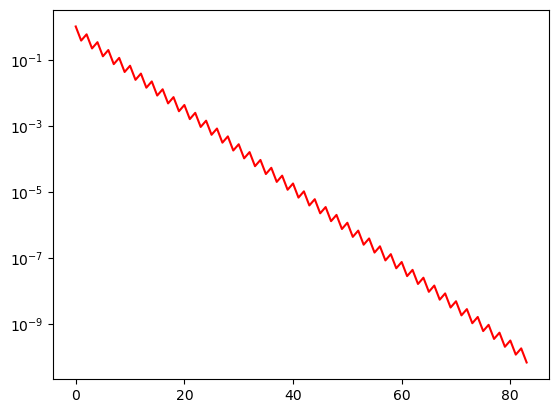

/tmp/ipykernel_101181/3147197869.py:105: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i][j] = f(np.array([[x_coor], [y_coor]]), A, b)


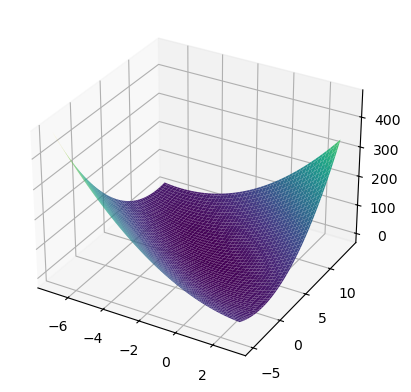

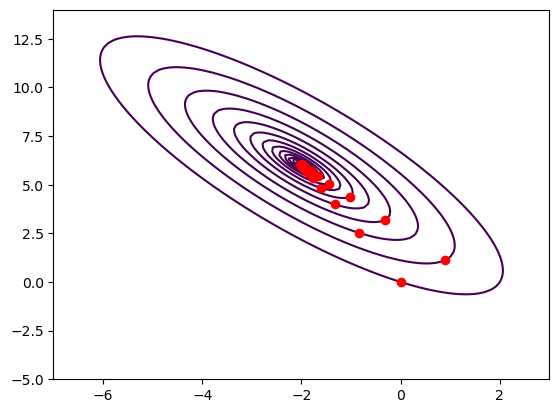

In [6]:
#!/bin/env python3

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def steepest_descent(A, b, x0, itmax, toll):
    n, m = A.shape
    if n != m:
        print("Matrice non quadrata")
        return None, None, None, None

    x = x0
    r = A@x - b
    p = -r
    it = 0
    nb = np.linalg.norm(b)
    criterio_di_arresto = np.linalg.norm(r) / nb
    vec_sol = [x]
    vec_r = [criterio_di_arresto]

    while criterio_di_arresto >= toll and it < itmax:
        it += 1
        Ap = A@p
        num = -(r.T@p)
        alpha = num / (p.T@Ap)

        x = x + alpha * p
        r = r + alpha * Ap
        vec_sol.append(x)
        criterio_di_arresto = np.linalg.norm(r) / nb
        vec_r.append(criterio_di_arresto)
        p = -r

    return x, vec_r, vec_sol, it


A = np.array([[8, 4], [4, 3]])
b = np.array([[8], [10]])
x0 = np.zeros_like(b)
itmax = 200
tol = 1e-10
x, vec_r, vec_sol, it = steepest_descent(A, b, x0, itmax, tol)
print(x, it)
plt.semilogy(np.arange(it+1), vec_r, '-r')
plt.show()


def steepest_descent_CL(A, b, x0, X, Y, Z, f, itmax, toll):
    n, m = A.shape
    if n != m:
        print("Matrice non quadrata")
        return None, None, None, None

    x = x0
    plt.contour(X, Y, Z, levels=f(x, A, b).flatten())
    plt.plot(x[0], x[1], 'ro')
    r = A@x - b
    p = -r
    it = 0
    nb = np.linalg.norm(b)
    criterio_di_arresto = np.linalg.norm(r) / nb
    vec_sol = [x]
    vec_r = [criterio_di_arresto]

    while criterio_di_arresto >= toll and it < itmax:
        it += 1
        Ap = A@p
        num = -(r.T@p)
        alpha = num / (p.T@Ap)

        x = x + alpha * p
        plt.contour(X, Y, Z, levels=f(x, A, b).flatten())
        plt.plot(x[0], x[1], 'ro')
        r = r + alpha * Ap
        vec_sol.append(x)
        criterio_di_arresto = np.linalg.norm(r) / nb
        vec_r.append(criterio_di_arresto)
        p = -r
    return x, vec_r, vec_sol, it


def f(x, A, b):
    Ax = A@x
    xTAx = x.T@Ax
    bx = b.T@x
    return 0.5 * xTAx - bx


A = np.array([[8, 4], [4, 3]])
b = np.array([[8], [10]])
x0 = np.zeros_like(b)
itmax = 200
tol = 1e-10
x = np.linspace(-7.0, 3.0, 100)
y = np.linspace(-5.0, 14.0, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(len(y)):
    for j in range(len(x)):
        x_coor = X[i][j]
        y_coor = Y[i][j]
        Z[i][j] = f(np.array([[x_coor], [y_coor]]), A, b)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)
plt.show()
x, vec_r, vec_sol, it = steepest_descent_CL(A, b, x0, X, Y, Z, f, itmax, tol)
plt.show()

[[-2.]
 [ 6.]] 2


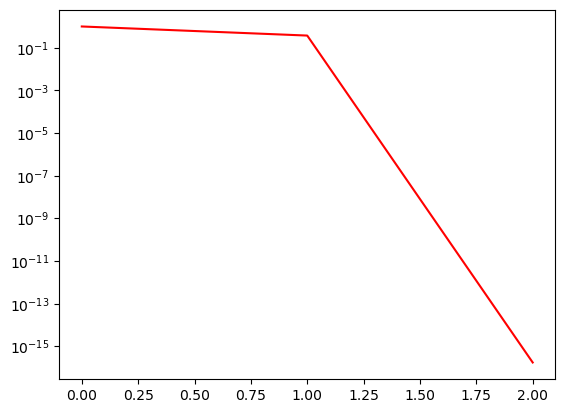

/tmp/ipykernel_101181/3850555311.py:111: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i][j] = f(np.array([[x_coor], [y_coor]]), A, b)


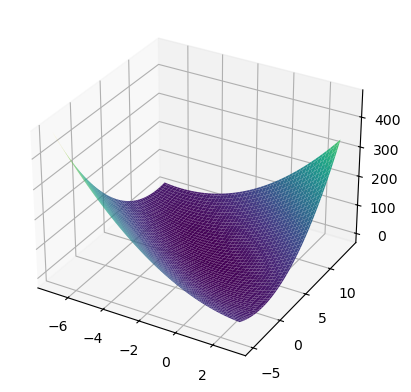

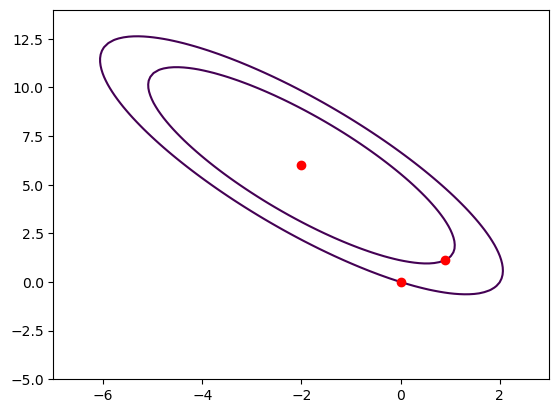

In [19]:
#!/bin/env python3

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def steepest_descent(A, b, x0, itmax, toll):
    n, m = A.shape
    if n != m:
        print("Matrice non quadrata")
        return None, None, None, None

    x = x0
    r = A@x - b
    p = -r
    it = 0
    nb = np.linalg.norm(b)
    criterio_di_arresto = np.linalg.norm(r) / nb
    vec_sol = [x]
    vec_r = [criterio_di_arresto]

    while criterio_di_arresto >= toll and it < itmax:
        it += 1
        Ap = A@p
        num = -(r.T@p)
        alpha = num / (p.T@Ap)

        x = x + alpha * p
        phi_den = r.T @ r
        r = r + alpha * Ap
        vec_sol.append(x)
        criterio_di_arresto = np.linalg.norm(r) / nb
        vec_r.append(criterio_di_arresto)
        phi_num = r.T@r
        phi = phi_num/phi_den
        p = -r + phi * p

    return x, vec_r, vec_sol, it


A = np.array([[8, 4], [4, 3]])
b = np.array([[8], [10]])
x0 = np.zeros_like(b)
itmax = 200
tol = 1e-10
x, vec_r, vec_sol, it = steepest_descent(A, b, x0, itmax, tol)
print(x, it)
plt.semilogy(np.arange(it+1), vec_r, '-r')
plt.show()


def steepest_descent_CL(A, b, x0, X, Y, Z, f, itmax, toll):
    n, m = A.shape
    if n != m:
        print("Matrice non quadrata")
        return None, None, None, None

    x = x0
    plt.contour(X, Y, Z, levels=f(x, A, b).flatten())
    plt.plot(x[0], x[1], 'ro-')
    r = A@x - b
    p = -r
    it = 0
    nb = np.linalg.norm(b)
    criterio_di_arresto = np.linalg.norm(r) / nb
    vec_sol = [x]
    vec_r = [criterio_di_arresto]

    while criterio_di_arresto >= toll and it < itmax:
        it += 1
        Ap = A@p
        num = -(r.T@p)
        alpha = num / (p.T@Ap)

        x = x + alpha * p
        phi_den = r.T @ r
        plt.contour(X, Y, Z, levels=f(x, A, b).flatten())
        plt.plot(x[0], x[1], 'ro--')
        r = r + alpha * Ap
        vec_sol.append(x)
        criterio_di_arresto = np.linalg.norm(r) / nb
        vec_r.append(criterio_di_arresto)
        phi_num = r.T@r
        phi = phi_num/phi_den
        p = -r + phi * p
    return x, vec_r, vec_sol, it


def f(x, A, b):
    Ax = A@x
    xTAx = x.T@Ax
    bx = b.T@x
    return 0.5 * xTAx - bx


A = np.array([[8, 4], [4, 3]])
b = np.array([[8], [10]])
x0 = np.zeros_like(b)
itmax = 200
tol = 1e-10
x = np.linspace(-7.0, 3.0, 100)
y = np.linspace(-5.0, 14.0, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(len(y)):
    for j in range(len(x)):
        x_coor = X[i][j]
        y_coor = Y[i][j]
        Z[i][j] = f(np.array([[x_coor], [y_coor]]), A, b)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)
plt.show()
x, vec_r, vec_sol, it = steepest_descent_CL(A, b, x0, X, Y, Z, f, itmax, tol)
plt.show()